# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Initial Hypothesis, validation and Notes

In [4]:
# client id, name - no relevence
# some of the DOB seems to be incorrect considering owning a car and driving liscence indian rule, treat them as outliers
# 3 categories in Gender
# No missing data in customer or policy data
# Calculate and create an customer age column
# Try binning of the data on customer age
# Try binning of the data on annual income

# Reading and Analyzing customer tab

In [5]:
customer = pd.read_excel('data/Cust&PolicySampleData_17Feb20.xlsx',sheet_name='Customer_Data')

In [6]:
customer.head()

,ClientId,ClientName,DateofBirth,Gender,Annual Income
0,1136,Client ABC1,1942-12-04,M,47079
1,48654,Client ABC2,1960-10-03,M,43706
2,52474,Client ABC3,2008-01-30,N,27458
3,57825,Client ABC4,1968-01-17,F,30493
4,82238,Client ABC5,1954-08-05,F,27669


In [8]:
customer["Gender"].value_counts()

F    2152
M    1995
N       4
Name: Gender, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273964CA048>]],
      dtype=object)

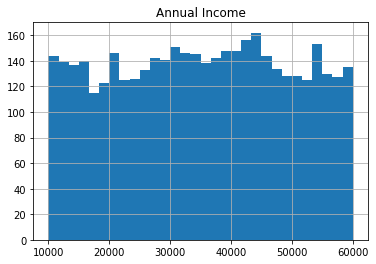

In [14]:
customer.hist(column="Annual Income",bins=30)

In [15]:
customer["age"]=np.abs((np.floor((pd.to_datetime('2020-02-22') - 
             pd.to_datetime(customer['DateofBirth'])).dt.days / 365.25))).astype(int)
customer["age"].describe()

count    4151.000000
mean       57.388581
std        13.610682
min         0.000000
25%        49.000000
50%        57.000000
75%        66.000000
max        95.000000
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273967B1348>]],
      dtype=object)

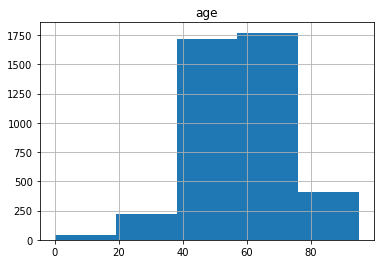

In [17]:
customer.hist(column="age",bins=5)

In [18]:
label = [20,40,60,80,100]
customer["age_bins"]=pd.cut(customer["age"], bins=[0,20,40,60,80,100],labels=label)

customer["age_bins"].value_counts()

60     2075
80     1458
40      384
100     195
20       37
Name: age_bins, dtype: int64

In [19]:
customer.nunique()

ClientId         4151
ClientName       4151
DateofBirth      3686
Gender              3
Annual Income    4017
age                82
age_bins            5
dtype: int64

In [20]:
customer["Annual Income"].describe()

count     4151.000000
mean     35050.618164
std      14240.400051
min      10021.000000
25%      22965.000000
50%      35247.000000
75%      46865.500000
max      59938.000000
Name: Annual Income, dtype: float64

In [12]:
cut_bin = [1,2,3,4]
customer["income_bins"]=pd.qcut(customer["Annual Income"], q=4,labels=cut_bin)

customer

,ClientId,ClientName,DateofBirth,Gender,Annual Income,age,age_bins,income_bins
0,1136,Client ABC1,1942-12-04,M,47079,77,80,4
1,48654,Client ABC2,1960-10-03,M,43706,59,60,3
2,52474,Client ABC3,2008-01-30,N,27458,12,20,2
3,57825,Client ABC4,1968-01-17,F,30493,52,60,2
4,82238,Client ABC5,1954-08-05,F,27669,65,80,2
...,...,...,...,...,...,...,...,...
4146,111447,Client ABC4147,1948-11-07,F,49279,71,80,4
4147,111451,Client ABC4148,1965-07-20,M,20821,54,60,1
4148,111457,Client ABC4149,1971-04-03,F,37489,48,60,3
4149,111459,Client ABC4150,1973-01-01,F,15685,47,60,1


# Reading and Analyzing policy tab

In [22]:
policy = pd.read_excel('data/Cust&PolicySampleData_17Feb20.xlsx',sheet_name='Policy_Data')
# policy.sort_values(by=['StartDate', 'EndDate'],ascending=False)

In [23]:
# change this calculation
policy["policy_duration"]=((pd.to_datetime(policy['EndDate']) - 
             pd.to_datetime(policy['StartDate'])).dt.days / 365).astype(int)
policy["policy_duration"].describe()

count    4151.000000
mean        0.948687
std         0.220662
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: policy_duration, dtype: float64

In [24]:
policy["policy_age"]=((pd.to_datetime('2020-02-22') - 
             pd.to_datetime(policy['StartDate'])).dt.days / 365).astype(int)

In [25]:
policy["policy_age"].describe()

count    4151.000000
mean        1.875693
std         1.654483
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: policy_age, dtype: float64

In [17]:
policy.nunique()

ClientId           4151
PolicyNumber       4151
ProductType           1
StartDate          1526
EndDate            1563
Premium            2984
Vehicle Value      3682
policy_duration       2
policy_age            6
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B90BEF048>]],
      dtype=object)

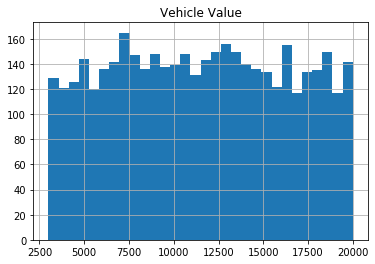

In [18]:
policy.hist(column="Vehicle Value",bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B90A50E88>]],
      dtype=object)

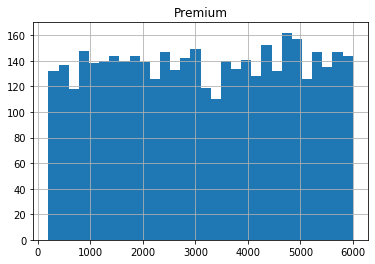

In [19]:
policy.hist(column="Premium",bins=30)

# Checking Missing client in either customer/policy

In [26]:
customer[~customer.ClientId.isin(policy.ClientId)]

,ClientId,ClientName,DateofBirth,Gender,Annual Income,age,age_bins


In [27]:
policy[~policy.ClientId.isin(customer.ClientId)]

,ClientId,PolicyNumber,ProductType,StartDate,EndDate,Premium,Vehicle Value,policy_duration,policy_age


In [28]:
policy[~customer.ClientId.isin(policy.ClientId)]

,ClientId,PolicyNumber,ProductType,StartDate,EndDate,Premium,Vehicle Value,policy_duration,policy_age


# Merge Customer and Policy data

In [111]:
merged_data = customer.merge(policy, on="ClientId")
merged_data.head()

,ClientId,ClientName,DateofBirth,Gender,Annual Income,age,age_bins,income_bins,PolicyNumber,ProductType,StartDate,EndDate,Premium,Vehicle Value,policy_duration,policy_age
0,1136,Client ABC1,1942-12-04,M,47079,77,80,4,PV000001,Private Vehicle,2017-10-03,2018-10-03,5705,11617,1,2
1,48654,Client ABC2,1960-10-03,M,43706,59,60,3,PV000002,Private Vehicle,2020-01-04,2021-01-04,869,9675,1,0
2,52474,Client ABC3,2008-01-30,N,27458,12,20,2,PV000076,Private Vehicle,2020-01-01,2021-01-01,1811,17552,1,0
3,57825,Client ABC4,1968-01-17,F,30493,52,60,2,PV000004,Private Vehicle,2020-01-30,2021-01-30,1988,10724,1,0
4,82238,Client ABC5,1954-08-05,F,27669,65,80,2,PV000005,Private Vehicle,2015-12-19,2016-12-19,2125,4491,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B97994148>,
      dtype=object)

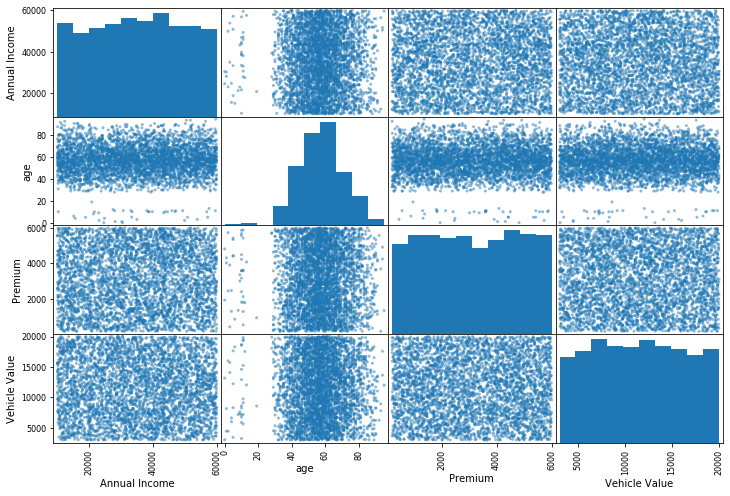

In [147]:
from pandas.plotting import scatter_matrix
scatter_matrix(merged_data[['Annual Income', 'age', 'Premium', 'Vehicle Value']], figsize=(12, 8))

# Results of Initial Data Analysis:

In [112]:
# Annual Income and policy premium does not seem to be on the same scale - calculate more information
# All policy# and clientId is distinct and unique - no policy renewal information. 
    #collecting policy renewal information data will provide more insight
    #No data available for policy type - whether it is for two wheeler or 4 wheeler,vehicle age, count of ownership transfer, ? 
    #or if there is a category of policy based on the benefits it provides and therefore more premium value for the policy?
    #These data collection will provide more details and insight for more analysis.
    # Collect some data related to customer satisfaction based on renewal, termination or feedback 
    #that can help us to analyze if increasing the premium amount woukd be right or not

##==> Inconsistencies due to probably system generated data    
# no correlation with Vehicle value and Annual Income in the data - shld have positive corelation?
# no correlation with premium and vehicle value in the data - shld have positive corelation?
# Age and Annual income might have also positive correlation but not in the data?
    
# Data is very eaqually distributed - This might not be the case in real time data. 
# Equally distribution of data might hide some of the patterns hidden in the data

# Collect more customer information to apply some clustering technique and do some customer segmentation 

# Customer segmentation - Clustering

In [135]:
merged_data = customer.merge(policy, on="ClientId")

In [136]:
temp = pd.get_dummies(merged_data["Gender"])
merged_data = pd.concat([merged_data, temp], axis=1)
merged_data.columns

Index(['ClientId', 'ClientName', 'DateofBirth', 'Gender', 'Annual Income',
       'age', 'age_bins', 'income_bins', 'PolicyNumber', 'ProductType',
       'StartDate', 'EndDate', 'Premium', 'Vehicle Value', 'policy_duration',
       'policy_age', 'F', 'M', 'N'],
      dtype='object')

## Kmean Clustering - Analysis

In [137]:
col=['Annual Income','age', 'Premium', 'Vehicle Value']
cluster_data=merged_data[col]
sample_incomplete_rows = cluster_data[cluster_data.isnull().any(axis=1)]
sample_incomplete_rows

,Annual Income,age,Premium,Vehicle Value


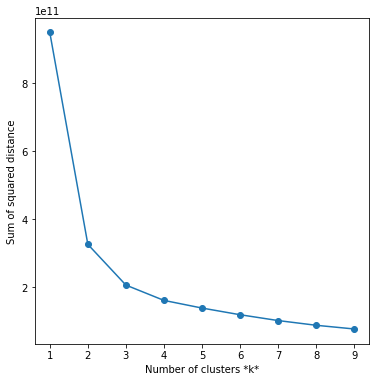

In [138]:
"""
col=['ClientId', 'ClientName', 'DateofBirth', 'Gender', 'Annual Income',
       'age', 'age_bins', 'income_bins', 'PolicyNumber', 'ProductType',
       'StartDate', 'EndDate', 'Premium', 'Vehicle Value', 'policy_duration',
       'policy_age', 'F', 'M', 'N']
"""
col=['Annual Income','age', 'Premium', 'Vehicle Value']
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

## 3 cluster seems to be apt for the given data

In [139]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [140]:
cluster = pd.DataFrame(data=Kmean.predict(cluster_data),columns=["cluster"])

In [141]:
sample_incomplete_rows = cluster[cluster.isnull().any(axis=1)]
sample_incomplete_rows

,cluster


In [142]:
merged_cluster_data = pd.concat([cluster_data, cluster], axis=1)

In [144]:
sample_incomplete_rows = merged_cluster_data[merged_cluster_data.isnull().any(axis=1)]
sample_incomplete_rows

,Annual Income,age,Premium,Vehicle Value,cluster


# 2D Visualization of cluster and the data features

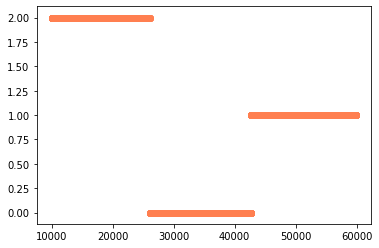

In [145]:
plt.scatter(merged_cluster_data["Annual Income"], merged_cluster_data["cluster"], c='coral')

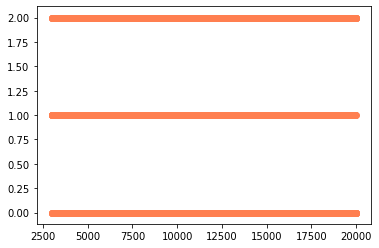

In [146]:
plt.scatter(merged_cluster_data["Vehicle Value"], merged_cluster_data["cluster"], c='coral')

# 3D Visualization of cluster and the data features

Text(0.5, 0, 'cluster')

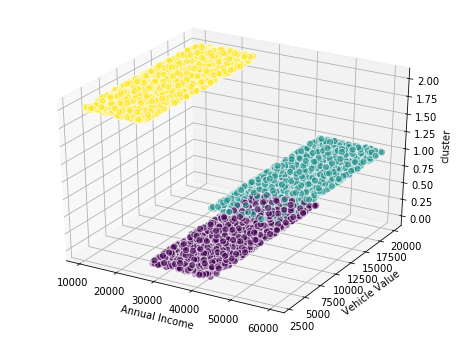

In [124]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = merged_cluster_data['Annual Income']
ys = merged_cluster_data['Vehicle Value']
zs = merged_cluster_data['cluster']
ax.scatter(xs, ys, zs, s=50, c=zs,alpha=0.6, edgecolors='w')

ax.set_xlabel('Annual Income')
ax.set_ylabel('Vehicle Value')
ax.set_zlabel('cluster')

Text(0.5, 0, 'cluster')

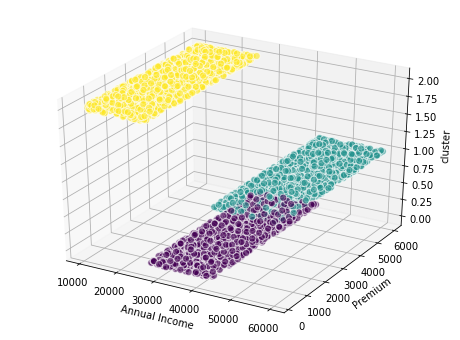

In [130]:
#['Annual Income', 'age', 'Premium', 'Vehicle Value', 'F', 'M', 'N','cluster']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = merged_cluster_data['Annual Income']
ys = merged_cluster_data['Premium']
zs = merged_cluster_data['cluster']
ax.scatter(xs, ys, zs, s=50, c=zs,alpha=0.6, edgecolors='w')

ax.set_xlabel('Annual Income')
ax.set_ylabel('Premium')
ax.set_zlabel('cluster')

# Results of clustering Analysis

In [149]:
# Clustering of the data mostly happened based on the Annual income.
# No relation seen on the data or clusters formed - 
    #This could be due to the system generated data where data is very much equally distributed
    #More data collection suggested above in previous analysis might bring more insight in clustering analysis

# Train some basic Machine Learning model to see the relation b/w the features after the model learning on the data

In [150]:
merged_data = customer.merge(policy, on="ClientId")
temp = pd.get_dummies(merged_data["Gender"])
merged_data = pd.concat([merged_data, temp], axis=1)
merged_data.columns

Index(['ClientId', 'ClientName', 'DateofBirth', 'Gender', 'Annual Income',
       'age', 'age_bins', 'income_bins', 'PolicyNumber', 'ProductType',
       'StartDate', 'EndDate', 'Premium', 'Vehicle Value', 'policy_duration',
       'policy_age', 'F', 'M', 'N'],
      dtype='object')

In [152]:
X_col = ['age_bins', 'income_bins',
        'Vehicle Value', 'policy_duration',
       'policy_age', 'F', 'M', 'N']
data = merged_data[['age_bins', 'income_bins',
       'Premium', 'Vehicle Value', 'policy_duration',
       'policy_age', 'F', 'M', 'N']]

In [153]:
# To keep sample deleting some of the rows created with null values after transformation
sample_incomplete_rows = data[data.isnull().any(axis=1)]
sample_incomplete_rows

data = data.dropna()  

In [154]:
X = data.drop(['Premium'],axis=1)
y=data['Premium'].copy()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
from sklearn.metrics import mean_squared_error
lin_reg_pred=lin_reg.predict(X_train)
lin_reg_mse = mean_squared_error(y_train,lin_reg_pred)
lin_reg_mse

2799429.0460373466

In [158]:
lin_reg_pred=lin_reg.predict(X_test)
lin_reg_mse = mean_squared_error(y_test,lin_reg_pred)
lin_reg_mse

2873818.30311072

In [161]:
pd.concat([pd.Series(lin_reg.coef_),pd.Series(X_col)],axis=1).sort_values(0,ascending=False)

,0,1
6,294.650485,M
3,218.417648,policy_duration
5,195.536652,F
1,31.687810,income_bins
4,5.273121,policy_age
2,0.000071,Vehicle Value
0,-0.505176,age_bins
7,-490.187136,N


In [162]:
# Training error and test error suggests the model is underfitting
# Coefficient of Hypothesis gives the feature importance in the learned model

# Random Forest

In [166]:
from sklearn.ensemble import RandomForestRegressor
rndForestReg = RandomForestRegressor(n_estimators=10,max_depth=10,max_features=7,random_state=42)
rndForestReg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [167]:
rndForestReg_pred=rndForestReg.predict(X_train)
rndForestReg_mse = mean_squared_error(y_train,rndForestReg_pred)
rndForestReg_mse

2241615.1316372827

In [168]:
rndForestReg_pred=rndForestReg.predict(X_test)
rndForestReg_mse = mean_squared_error(y_test,rndForestReg_pred)
rndForestReg_mse

2956648.248123926

In [169]:
rndForestReg.feature_importances_

array([9.21218689e-02, 1.01375684e-01, 6.10283482e-01, 2.71652583e-02,
       1.24200096e-01, 1.64637597e-02, 2.83709211e-02, 1.89308382e-05])

In [171]:
pd.concat([pd.Series(rndForestReg.feature_importances_),pd.Series(X_col)],axis=1).sort_values(0,ascending=False)

,0,1
2,0.610283,Vehicle Value
4,0.124200,policy_age
1,0.101376,income_bins
0,0.092122,age_bins
6,0.028371,M
3,0.027165,policy_duration
5,0.016464,F
7,0.000019,N


# Results of Analysis - Machine Learning techniques

In [ ]:
# Feture importance of random forest looks more intutive compared to Linear regression.
# Analyzing the coefficients of linear regression +ve coefficeint suggest some positive correlation 
# and -ve coefficient suggests negative correlation
# Taking the top few features of random forest and combining our coefficient (+ve and -ve) of linear regression: 
# we can build hypothesis that 
    #1 -  Higher the vehicle value customer shld have or can afford higher premium
    #2 -  Higher the income, customer can afford higher premium
    #3 -  More the age of the customer he can afford higher premium. More analysis needed if this is true for senior citizens as well?
    
# More analysis would be required on the real data where we can actually see some more hidden patterns 
# and some of other data that needs to be collected pointed in analysis above can give better insights of the data